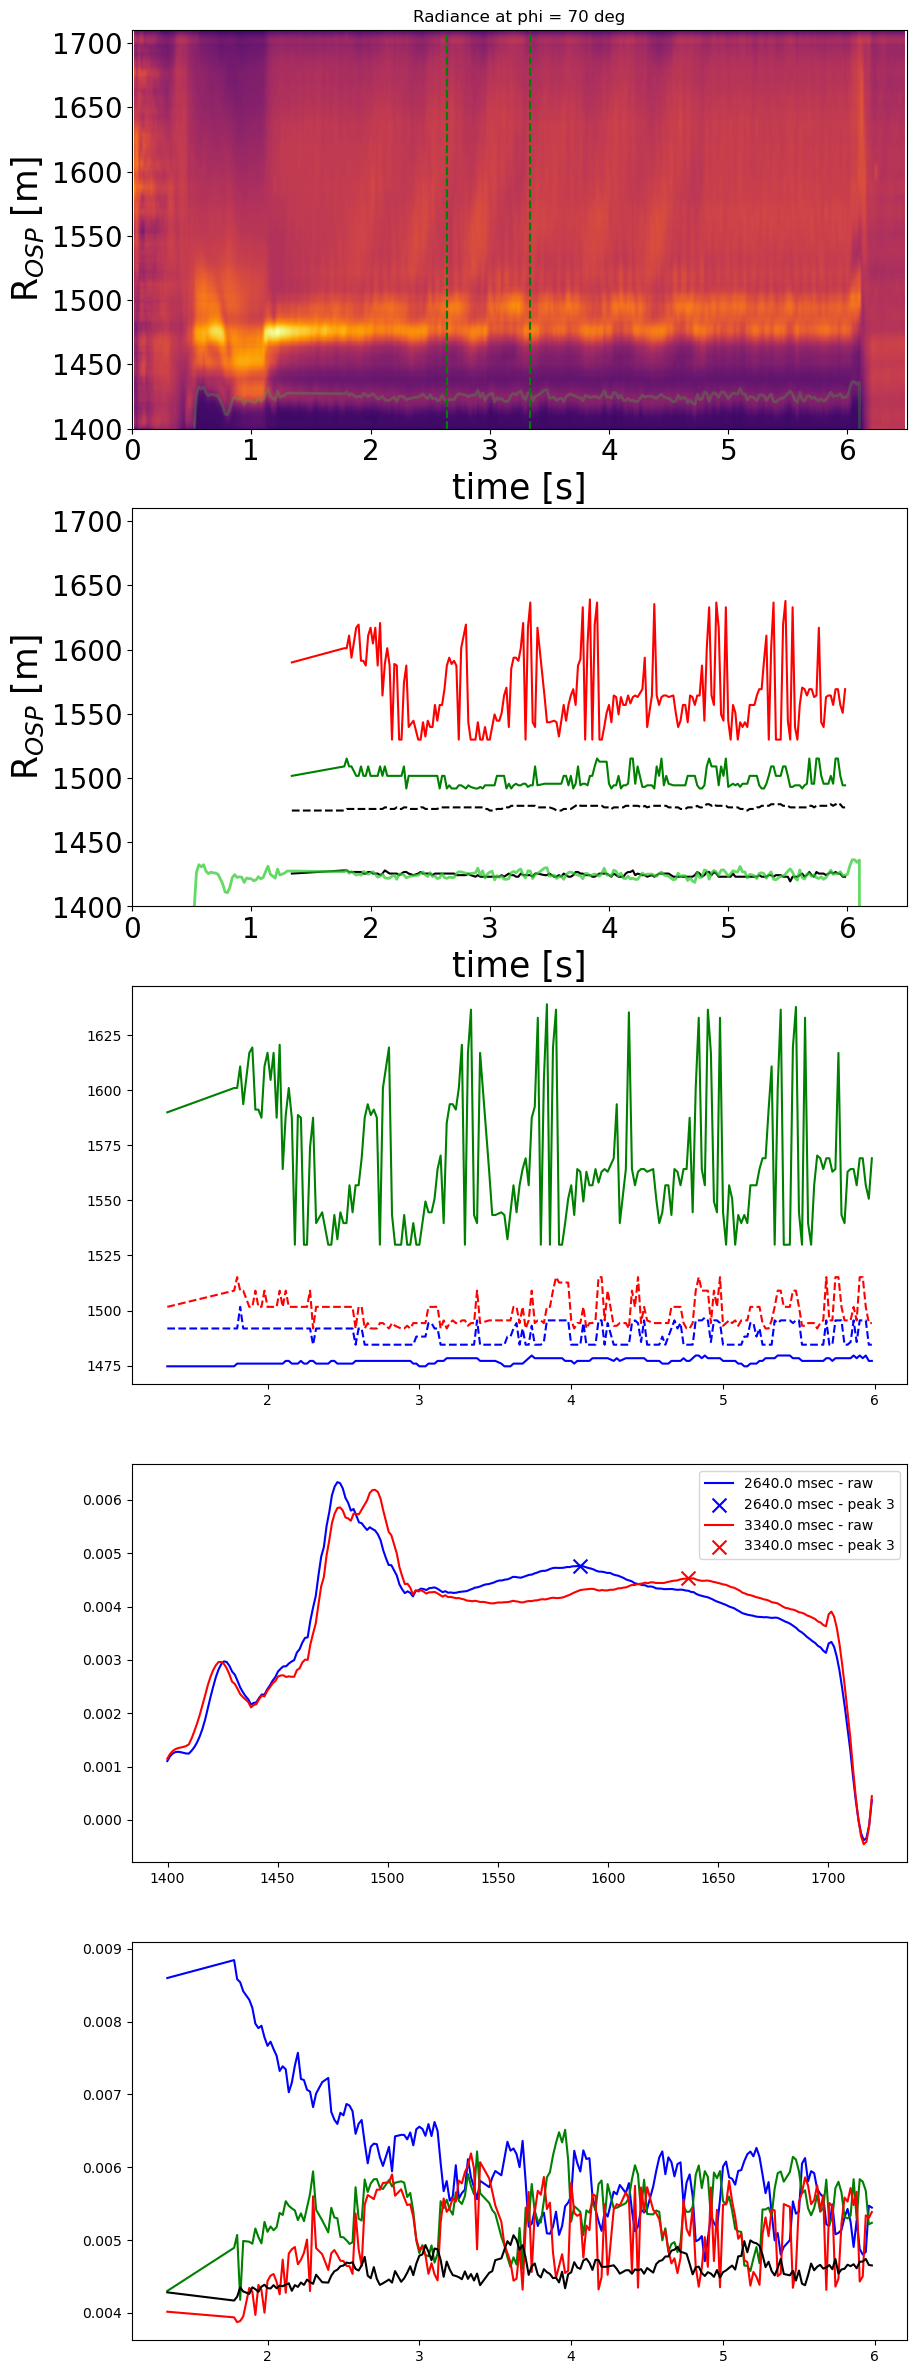

In [6]:
import read
import matplotlib.pyplot as plt
import plot_tools as plot
import process
import scipy.signal as signal
import numpy as np
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

def find_peak(profile):
    #! profile is a 1D array
    #! returns the index of the peak in the profile
    #return signal.find_peaks_cwt(profile,np.arange(1,5),min_snr=5,window_size=10)
    return signal.find_peaks_cwt(profile,np.arange(1,10),min_snr=10,window_size=5)


shot = 192974
r,t,p,p_f = read.fast_cam_filtered_prof(shot,70,filt_parm=[17,3],r_min=1400)
fig, ax = plt.subplots(5,1,figsize=(10,30))
ax1, ax2, ax3, ax4, ax5 = ax
ax1.contourf(t,r,p_f,cmap='inferno',levels=1000)
ax1.set_ylabel('R [mm]')
ax1.set_xlabel('time [s]')
ax1.set_title(f'Radiance at phi = 70 deg')
osp,t,units = read.one_d(shot,'rvsod')
plot.plot1d_ax(ax1,t/1000,osp*1000,'time [s]',r'R$_{OSP}$ [m]',xlim=[0,6.5],ylim=[1.4*1000,1.71*1000],c='limegreen',alpha=0.25)
# get a profile at 3.2 seconds
sp, sec2, sec3 = [], [], []
for time in t:
    if time > 1300 and time < 6000:    
        ind = process.nearest(t,time)
        raw = p[ind,:]/sum(p[ind,:])
        filt = p_f[ind,:]/sum(p_f[ind,:])
        r_pos = r[ind]
        if time in [3340.0, 2640.0]:
            if time == 3340.0:
                ax4.plot(r_pos,filt,'r-',label=f'{time} msec - raw')
            if time == 2640.0:
                ax4.plot(r_pos,filt,'b-',label=f'{time} msec - raw')
            # show vline on ax1 for the profile
            ax1.axvline(x=time/1000,c='g',linestyle='--')
        # split each profile in 4 r_pos sections
        # section 1 is from 1410 to 1440
        r1 = process.nearest(r_pos,1410)
        r2 = process.nearest(r_pos,1440)
        section1 = r_pos[r1:r2]
        raw1 = raw[r1:r2]
        filt1 = filt[r1:r2]
        # index of max filt1 value
        peak_pos1 = np.argmax(filt1)
        sp.append({time:section1[peak_pos1]})
        # section 2 is from 1470 to 1550
        r1 = process.nearest(r_pos,1470)
        r2 = process.nearest(r_pos,1550)
        section2 = r_pos[r1:r2]
        raw2 = raw[r1:r2]
        filt2 = filt[r1:r2]
        # find peaks in filt2
        peak_pos2 = find_peaks(filt2, distance=5)
        sec2.append({'time':time,'pos':section2[peak_pos2[0]],'amp':filt2[peak_pos2[0]]})
        # section 3 is from 1530 to 1700
        r1 = process.nearest(r_pos,1530)
        r2 = process.nearest(r_pos,1700)
        section3 = r_pos[r1:r2]
        raw3 = raw[r1:r2]
        filt3 = filt[r1:r2]
        # find peaks in filt3
        peak_pos3_idx = np.argmax(filt3)
        peak_pos3 = section3[peak_pos3_idx]
        peak_amp3 = filt3[peak_pos3_idx]
        if time in [3340.0, 2640.0]:
            if time == 3340.0:
                ax4.scatter(peak_pos3,peak_amp3,c='r',label=f'{time} msec - peak 3'
                            ,s=100,marker='x')
            if time == 2640.0:
                ax4.scatter(peak_pos3,peak_amp3,c='b',label=f'{time} msec - peak 3'
                            ,s=100,marker='x')
        sec3.append({'time':time,'pos':peak_pos3,'amp':peak_amp3})
# plot sp, keys on x axis, values on y axis
time = []
r_pos = []
for i in sp:
    for key in i:
        time.append(key)    
        r_pos.append(i[key])
time = np.array(time)/1000
r_pos = np.array(r_pos)
ax2.plot(time,r_pos,'k-',label='strike point')
ax2.set_ylim([1400,1710])
osp,t,units = read.one_d(shot,'rvsod')
plot.plot1d_ax(ax2,t/1000,osp*1000,'time [s]',r'R$_{OSP}$ [m]',xlim=[0,6.5],ylim=[1.4*1000,1.71*1000],c='limegreen',alpha=0.75)
# section 2
amp_pk1, amp_pk2, amp_pk3 ,pos_pk1,pos_pk2,pos_pk3,time = [],[],[],[],[],[],[]
for i in sec2:
    time.append(i['time'])    
    pos_pk1.append(i['pos'][0])
    pos_pk2.append(i['pos'][1])
    pos_pk3.append(i['pos'][2])
    amp_pk1.append(i['amp'][0])
    amp_pk2.append(i['amp'][1])
    amp_pk3.append(i['amp'][2])

time = np.array(time)/1000
pos_pk1 = np.array(pos_pk1)
pos_pk2 = np.array(pos_pk2)
ax2.plot(time,pos_pk1,'k--',label='peak 1')
#ax2.plot(time,pk2,'k.',label='peak 2')
ax2.plot(time,pos_pk3,'g-',label='peak 3')
ax3.plot(time,pos_pk1,'b-',label='peak 1')
ax3.plot(time,pos_pk2,'b--',label='peak 2')
ax3.plot(time,pos_pk3,'r--',label='peak 3')
# show legend for ax4
ax4.legend()

# section 3
time = []
s3pos = []
s3amp = []
for i in sec3:
    time.append(i['time'])    
    s3pos.append(i['pos'])
    s3amp.append(i['amp'])
time = np.array(time)/1000
s3pos_pk3 = np.array(pos_pk3)
ax3.plot(time,s3pos,'g-',label='peak 3')
ax2.plot(time,s3pos,'r-',label='peak 3')

# plot all peak amplitudes
ax5.plot(time,amp_pk1,'b-',label='peak 1')
ax5.plot(time,amp_pk2,'g-',label='peak 2')
ax5.plot(time,amp_pk3,'r-',label='peak 3')
ax5.plot(time,s3amp,'k-',label='section3 - peak')

In [2]:
sec2

[{'time': 1340.0,
  'pos': array([1474.68483816, 1491.85689949, 1501.66950596, 1509.02896082,
         1515.16183986, 1522.52129472, 1531.10732538, 1544.59965928]),
  'amp': array([0.00859765, 0.00429956, 0.00401461, 0.0038836 , 0.00389328,
         0.00393186, 0.00388335, 0.0039042 ])},
 {'time': 1780.0,
  'pos': array([1474.68483816, 1491.85689949, 1509.02896082, 1515.16183986,
         1526.20102215, 1539.69335605]),
  'amp': array([0.00884355, 0.00489225, 0.00393716, 0.00390532, 0.00392959,
         0.00393682])},
 {'time': 1800.0,
  'pos': array([1475.91141397, 1491.85689949, 1515.16183986, 1521.29471891,
         1544.59965928]),
  'amp': array([0.00858119, 0.00506802, 0.00387087, 0.00387267, 0.00396288])},
 {'time': 1820.0,
  'pos': array([1475.91141397, 1501.66950596, 1509.02896082, 1515.16183986,
         1521.29471891, 1532.33390119, 1539.69335605]),
  'amp': array([0.00853933, 0.00417813, 0.00388676, 0.00387129, 0.00390221,
         0.00387834, 0.0038933 ])},
 {'time': 1840.

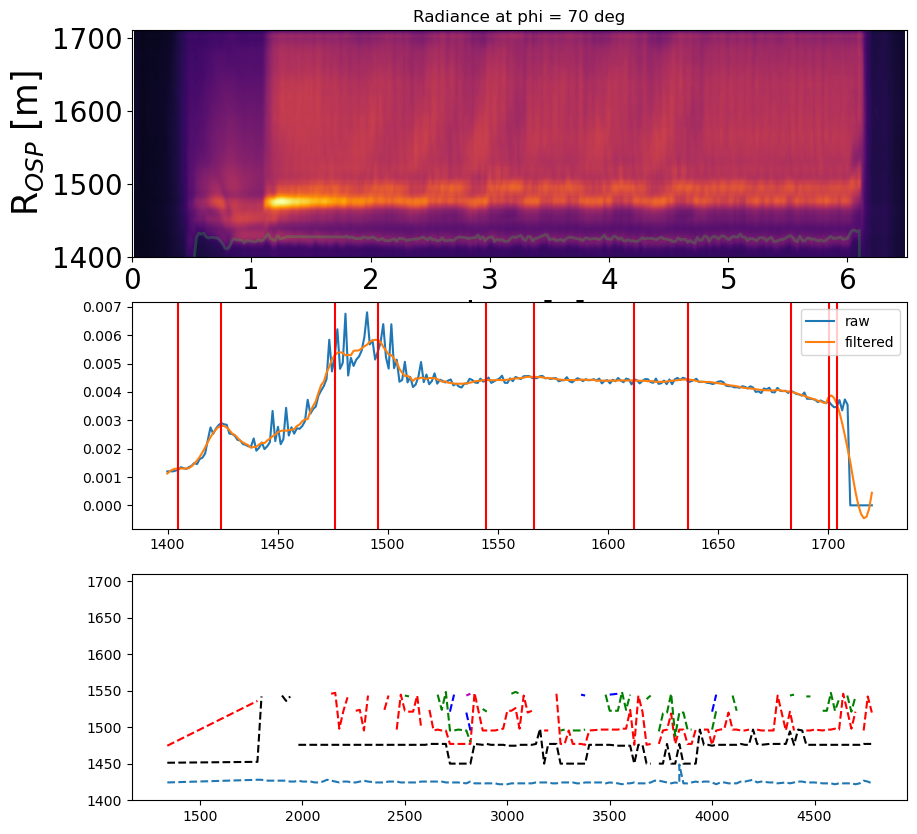

In [ ]:
import read
import matplotlib.pyplot as plt
import plot_tools as plot
import process
import scipy.signal as signal
import numpy as np

def find_peak(profile):
    #! profile is a 1D array
    #! returns the index of the peak in the profile
    #return signal.find_peaks_cwt(profile,np.arange(1,5),min_snr=5,window_size=10)
    return signal.find_peaks_cwt(profile,np.arange(1,1),min_snr=4,window_size=10)


shot = 192974
r,t,p,p_f = read.fast_cam_filtered_prof(shot,70,filt_parm=[17,3],r_min=1400)
fig, ax = plt.subplots(5,1,figsize=(10,10))
ax1, ax2, ax3, ax4, ax5 = ax
ax1.contourf(t,r,p_f,cmap='inferno',levels=1000)
ax1.set_ylabel('R [mm]')
ax1.set_xlabel('time [s]')
ax1.set_title(f'Radiance at phi = 70 deg')
osp,t,units = read.one_d(shot,'rvsod')
plot.plot1d_ax(ax1,t/1000,osp*1000,'time [s]',r'R$_{OSP}$ [m]',xlim=[0,6.5],ylim=[1.4*1000,1.71*1000],c='limegreen',alpha=0.25)
# get a profile at 3.2 seconds
sp, peaks = [], []
for time in t:
    if time > 1300 and time < 4800:    
        ind = process.nearest(t,time)
        raw = p[ind,:]/sum(p[ind,:])
        filt = p_f[ind,:]/sum(p_f[ind,:])
        r_pos = r[ind]
        # find peaks 
        pks = find_peak(filt)
        if time == 4400.0:
            ax2.plot(r_pos,raw,label='raw')
            ax2.plot(r_pos,filt,label='filtered')
            ax2.legend()
            # show peaks as vline
            for peak in find_peak(filt):
                ax2.axvline(r_pos[peak],c='r')
        # get the position of strike point 
        for pk in pks: 
            if 1410 <= r_pos[pk] <= 1449:
                sp.append([time,r_pos[pk]])
        roi = []
        for pk in pks:
            if 1450 <= r_pos[pk] <= 1550:
                roi.append(r_pos[pk])
        peaks.append([time,roi])
        
# unpack sp into time and position
time, pos = zip(*sp)
ax3.plot(time,pos,'--',label='strike point')
ax3.set_ylim([1400,1710])
time, peak_pos = zip(*peaks)
# show position of first peak 
first = [x[0] if len(x) > 0 else np.nan for x in peak_pos]
ax3.plot(time,first,'k--',label='first peak')
# extract second peak if it exists
second = [x[1] if len(x) > 1 else np.nan for x in peak_pos]
ax3.plot(time,second,'r--',label='second peak')
# extract third peak if it exists
third = [x[2] if len(x) > 2 else np.nan for x in peak_pos]
ax3.plot(time,third,'g--',label='third peak')
# extract fourth peak if it exists
fourth = [x[3] if len(x) > 3 else np.nan for x in peak_pos]
ax3.plot(time,fourth,'b--',label='fourth peak')
# extract fifth peak if it exists
fifth = [x[4] if len(x) > 4 else np.nan for x in peak_pos]
ax3.plot(time,fifth,'m--',label='fifth peak')

In [1]:
import read
import matplotlib.pyplot as plt
import process
import plot_tools as plot 

shot = 192973
phi = 70
r,t,p,p_f = read.fast_cam_filtered_prof(shot,70,filt_parm=[17,3],r_min=1400)
time = []
for x in t:
    time.append(x[0]*1000)
t = time
# plot and save each profile as a 1d plot 
for time in t:
    if time > 1000.0 and time < 6000.0:    
        fig, ax = plt.subplots(3,1,figsize=(10,10))
        # shot number as title
        fig.suptitle('Shot #{}'.format(shot),fontsize=20)
        colors = ['darkorchid','darkorange','black']
        wforms = process.extract_IC_wforms(shot)
        if wforms['PCC'] is not None:
            mode = wforms['MODE']
            plot.plot1d_ax(ax[0],wforms['PCC']['time'],
                            wforms['PCC']['ampl'],'','Amplitude [kA]',
                            c='black',l=f'PCC, n = {mode}',xlim=[1000,6000],ylim=[0,7])
            plot.plot1d_ax(ax[1],wforms['PCC']['time'],
                            wforms['PCC']['phase'],'Time [ms]','Phase [deg]',
                            c='black',l='',xlim=[1000,6000])      
            ax[0].legend(loc='upper left',fontsize=20) 
            ax[1].set_yticks([0,90,180,270,360])
            ax[1].set_yticklabels(['0','90','180','270','360']) 
            ax[0].set_xticklabels([])
            plot.add_minor_ticks(ax[0])
            plot.add_minor_ticks(ax[1])

        if wforms['PCC'] is None:
            mode = wforms['MODE']
            plot.plot1d_ax(ax[0],wforms['PCIL']['time'],
                            wforms['PCIL']['ampl'],'','Amplitude [kA]',
                            c='darkorchid',l=f'PCIL , n = {mode}',xlim=[1000,6000])
            plot.plot1d_ax(ax[1],wforms['PCIL']['time'],
                            wforms['PCIL']['phase'],'Time [ms]','Phase [deg]',
                            c='darkorchid',l='PCIL',xlim=[1000,6000])
            plot.plot1d_ax(ax[0],wforms['PCIU']['time'],
                            wforms['PCIU']['ampl'],'','Amplitude [kA]',
                            c='darkorange',l=f'PCIU, n = {mode}',xlim=[1000,6000],ylim=[0,3])
            plot.plot1d_ax(ax[1],wforms['PCIU']['time'],
                            wforms['PCIU']['phase'],'Time [ms]','Phase [deg]',
                            c='darkorange',l='PCIU',xlim=[1000,6000])  
            ax[0].legend(loc='upper left',fontsize=20) 
            ax[1].set_yticks([0,90,180,270,360])
            ax[1].set_yticklabels(['0','90','180','270','360']) 
            ax[0].set_xticklabels([])
            plot.add_minor_ticks(ax[0])
            plot.add_minor_ticks(ax[1])
        ind = process.nearest(t,time)
        raw = p[ind,:]/sum(p[ind,:])
        filt = p_f[ind,:]/sum(p_f[ind,:])
        r_pos = r[ind]
        ax[2].plot(r_pos,filt,label='filtered')
        ax[2].set_title(f'Radiance profile at {time} msec')
        ax[2] = plot.standard_ax(ax[2],'R [mm]',r'Normalized Radiance',xlim=[1400,1710],ylim=[0,0.01])
        # add vline to ax[0,1] to show time
        ax[0].axvline(time,c='r')
        ax[1].axvline(time,c='r')
        fig.tight_layout()
        plt.savefig(f'/fusion/projects/results/fastcam/PPPL/maana/MP-2022-34-53/shot_{shot}/profiles/filt_prof_phi={int(phi)}_{int(time)}.png')
        plt.close()

looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for slc_wforms/192973_PCC.sav
looking for 

In [5]:
import cv2
import os

def create_video_from_png(folder_path, output_path, fps=30):
    images = []
    for filename in sorted(os.listdir(folder_path)):
        if filename.endswith(".png"):
            img_path = os.path.join(folder_path, filename)
            images.append(cv2.imread(img_path))

    if not images:
        raise ValueError("No PNG files found in the folder")

    height, width, _ = images[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Change codec if necessary, e.g., 'XVID'
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for img in images:
        video_writer.write(img)

    video_writer.release()

# Example usage

folder_path = f"/fusion/projects/results/fastcam/PPPL/maana/MP-2022-34-53/shot_{shot}/profiles"
output_path = f"/fusion/projects/results/fastcam/PPPL/maana/MP-2022-34-53/shot_{shot}/profile_{shot}.mp4"
create_video_from_png(folder_path, output_path, fps=5)

In [3]:
shot

192973

In [24]:
time

[20.0,
 40.0,
 60.0,
 80.0,
 100.0,
 120.0,
 140.0,
 160.0,
 180.0,
 200.0,
 220.0,
 240.0,
 260.0,
 280.0,
 300.0,
 320.0,
 340.0,
 360.0,
 380.0,
 400.0,
 420.0,
 440.0,
 460.0,
 480.0,
 500.0,
 520.0,
 540.0,
 560.0,
 580.0,
 600.0,
 620.0,
 640.0,
 660.0,
 680.0,
 700.0000000000001,
 720.0,
 740.0,
 760.0,
 780.0,
 800.0,
 820.0000000000001,
 840.0,
 860.0,
 880.0,
 900.0,
 920.0,
 940.0000000000001,
 960.0,
 980.0,
 1000.0,
 1020.0,
 1040.0,
 1060.0,
 1080.0,
 1100.0,
 1120.0,
 1140.0000000000002,
 1160.0,
 1180.0,
 1200.0,
 1220.0,
 1240.0,
 1260.0,
 1280.0,
 1300.0,
 1320.0,
 1340.0,
 1360.0,
 1380.0000000000002,
 1400.0000000000002,
 1420.0,
 1440.0,
 1460.0,
 1480.0,
 1500.0,
 1520.0,
 1540.0,
 1560.0,
 1580.0,
 1600.0,
 1620.0,
 1640.0000000000002,
 1660.0000000000002,
 1680.0,
 1700.0,
 1720.0,
 1740.0,
 1760.0,
 1780.0,
 1800.0,
 1820.0,
 1840.0,
 1860.0,
 1880.0000000000002,
 1900.0000000000002,
 1920.0,
 1940.0,
 1960.0,
 1980.0,
 2000.0,
 2020.0,
 2040.0,
 2060.0,
 2080.